In [382]:
from pyforest  import*
import warnings
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import time


In [383]:
data = pd.read_csv("./../data/zomato.csv") #the dataset is too big so i make a copy of 20000 first rows only 
 #and i delete the original one manually and name the new one zamato

data.head()

<IPython.core.display.Javascript object>

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [384]:
data.shape

(6400, 17)

In [385]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [386]:
#total null
data.isna().sum()



url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                            846
votes                             0
phone                           115
location                          1
rest_type                        26
dish_liked                     3537
cuisines                          5
approx_cost(for two people)      13
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [387]:
data=data.dropna()

In [388]:
data.isna().sum()


url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [389]:
#delete unneccessary colums
df = data.drop (['url','phone'],axis = 1)

In [390]:
#any duplicate?
df.duplicated().sum()

0

In [391]:
# remouve all duplicate
df.drop_duplicates(inplace = True)
# test 
df.duplicated().sum()

0

In [392]:
#Drop null value
df.dropna(how = 'any',inplace = True)
#checking
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [393]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [401]:
#rename columns
df = df.rename(columns = {
    'approx_cost(for two people)':'cost',
    'listed_in(type)':'type',
    'listed_in(city)':'city'})

In [402]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [403]:
#cleaning 
df.dtypes
# i seec cost in an oject here String object
df['cost'].unique()
#yeah it s string and the comma should be dot also

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400'], dtype=object)

In [404]:
df['cost'] = df['cost'].apply (lambda x:x.replace(',',''))
df['cost'] = df['cost'].astype(float)
#verication
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [405]:
#verify if comma are deleted
print(df['cost'].unique())

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400.]


In [406]:
#same for rating .need to be clean
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5'], dtype=object)

In [407]:
#DELETE THE NEW
df = df.loc[df.rate != 'NEW']
df['rate'] =[ x.replace('/5','') for x in df['rate'] ]
df['rate']

0       4.1
1       4.1
2       3.8
3       3.7
4       3.8
       ... 
6384    3.2
6385    3.9
6386    3.6
6391    3.8
6392    3.9
Name: rate, Length: 2816, dtype: object

In [408]:
df.shape


(2816, 15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

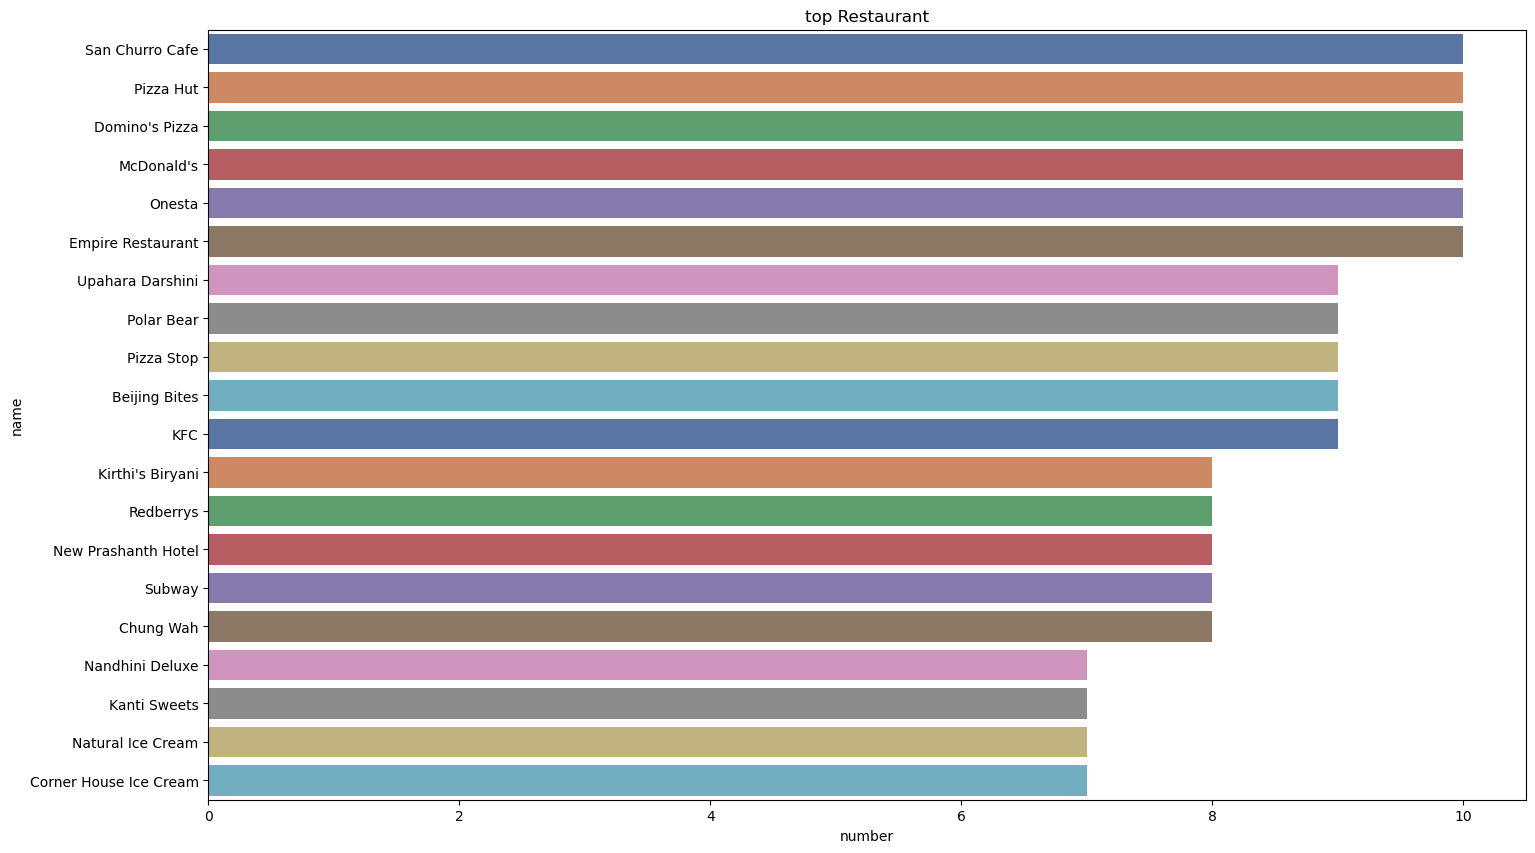

In [409]:
df.to_csv('./../data/zomatoClean.csv',index=False)

plt.figure(figsize=(17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("top Restaurant")
plt.xlabel("number")
plt.show()


In [410]:
#restaurant that offer booking or not

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

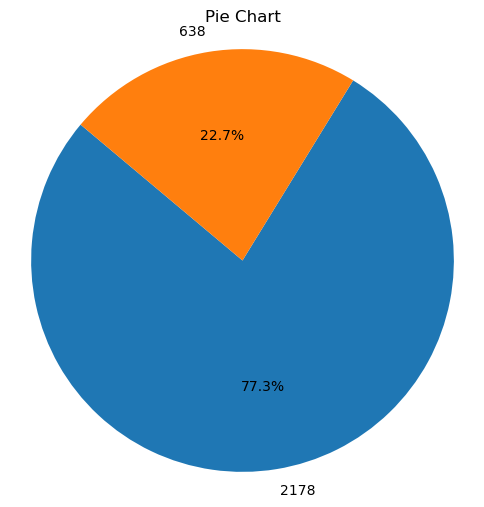

In [411]:
x = df['book_table'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(x, labels=x, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart')
plt.show()

In [412]:
#online order
df


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,"KFDC Ltd, Cubbon Park, K.R.Circle, Lavelle Roa...",Mathsya Darshini,No,No,3.2,57,Lavelle Road,Quick Bites,"Sea Food, Fish Fry, Fish Curry, Fish Kebab, Bu...","Seafood, Mangalorean",350.0,"[('Rated 3.0', 'RATED\n Its a darshini inside...",[],Dine-out,Brigade Road
6385,"15/4 Museum Road, Oppsite SBI Gate No 2, Shant...",SGS Non Veg - Gundu Pulav,Yes,No,3.9,55,St. Marks Road,Quick Bites,Chilli Chicken,"Biryani, Fast Food",400.0,"[('Rated 4.0', 'RATED\n Loved the chicken pul...",[],Dine-out,Brigade Road
6386,"12/1, Hayes Road, Residency Road, Bangalore",Masala Oota,Yes,No,3.6,79,Residency Road,Quick Bites,"Donne Chicken Biryani, Akki Rottis, Roti, Mutt...","South Indian, Biryani",500.0,"[('Rated 4.0', 'RATED\n A surprisingly large ...",[],Dine-out,Brigade Road
6391,"2, Church Street, Bangalore",Mel's Korner,No,No,3.8,95,Church Street,Quick Bites,"Shawarma, Burgers, Beef Burger, Potato Wedges,...",Fast Food,500.0,"[('Rated 5.0', ""RATED\n Mel's Korner in churc...",[],Dine-out,Brigade Road


In [413]:
df['rate'].dtypes

dtype('O')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

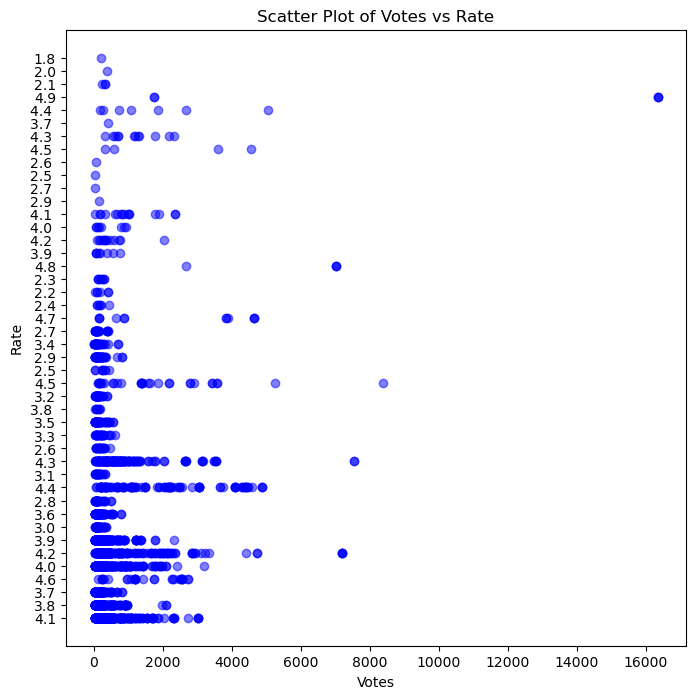

In [414]:
plt.figure(figsize=(8, 8))
plt.scatter(df['votes'], df['rate'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Votes vs Rate')
plt.xlabel('Votes')
plt.ylabel('Rate')
plt.grid(False)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x700 with 0 Axes>

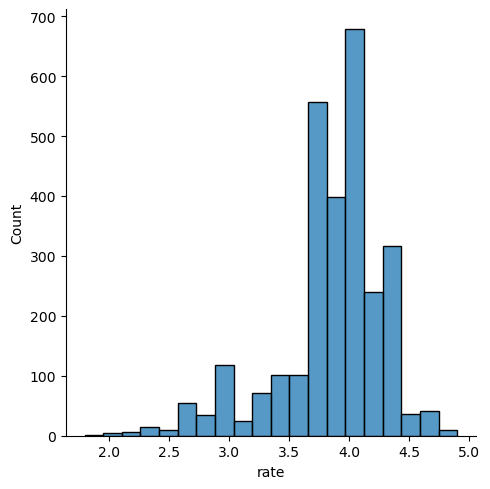

In [415]:
#distribution of review rate
df['rate'] = df['rate'].astype(float) #convert first object to float
plt.figure(figsize = (9,7))
sns.displot(df['rate'],bins=20)

In [416]:
#Counting rating betwen 1 and 2,2 and 3, 3 and 4 ,and 4 and 5

In [417]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [418]:
#min
df['rate'].min()

1.8

In [419]:
#max
df['rate'].max()

4.9

In [420]:
#between 1 and 2
x1=((df['rate']>=1) & (df['rate']<2)).sum()
x1

1

In [421]:
#between 2 and 3
x2=((df['rate']>=2) & (df['rate']<3)).sum()
x2

175

In [422]:
#between 3 and 4
x3=((df['rate']>=3) & (df['rate']<4)).sum()
x3

1318

In [423]:
#between 4 and 5
x4=((df['rate']>=4) & (df['rate']<=5)).sum()
x4

1322

In [424]:
slices = [x1,x2,x3,x4]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

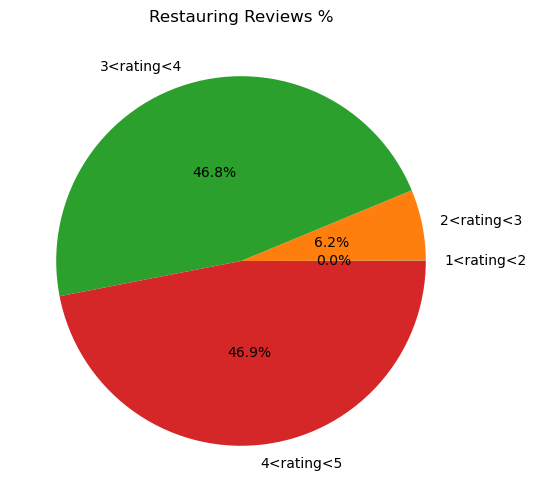

In [425]:
label=['1<rating<2','2<rating<3','3<rating<4','4<rating<5']

plt.figure(figsize=(6, 6))
plt.pie(slices, labels=label, autopct='%1.1f%%' ,pctdistance=.5)
fig = plt.gcf()
plt.title('Restauring Reviews %')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'Type of Restaurant'), Text(0.5, 1.0, 'Number')]

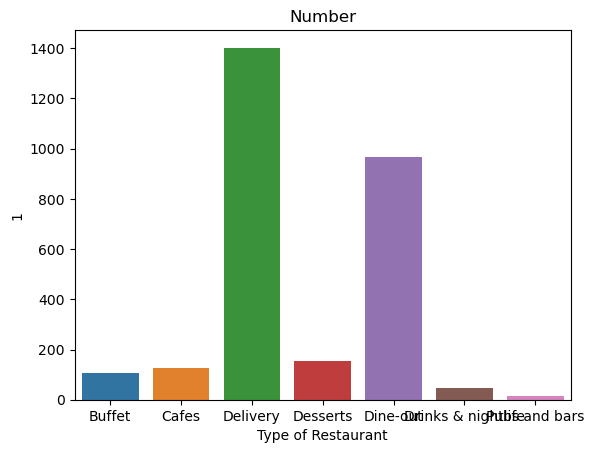

In [426]:
#Service Type
#sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(),rotation=90,ha="right")
#fig = plt.gcf()
#fig.set_size_inches(12,12)
#plt.title("Type Of Service")
word_counts = {}

for word in df['type']:
  if word in word_counts:
    word_counts[word] += 1
  else:
    word_counts[word] = 1
    
my_df = pd.DataFrame(word_counts .items())
ax = sns.barplot(x=0, y=1, data=my_df)
ax.set(xlabel = 'Type of Restaurant',  title='Number')



In [427]:
from plotly.offline import iplot

In [428]:
lower_bound = df['cost'].quantile(0.1)  # Adjust as needed
upper_bound = df['cost'].quantile(0.9)  # Adjust as needed


df = df[(df['cost'] >= lower_bound) & (df['cost'] <= upper_bound)]

In [429]:
trace0 = go.Box(y=df['cost'],name="Accepting Online Order",marker=dict(color='rgb(113,10,100)',))
data=[trace0]
layout=go.Layout(title="Box plot of approx cost",width=800,height=900,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
fig

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [430]:
lower_bound = df['rate'].quantile(0.05)  # Adjust as needed
upper_bound = df['rate'].quantile(0.9)  # Adjust as needed


df = df[(df['rate'] >= lower_bound) & (df['rate'] <= upper_bound)]

In [431]:



trace0 = go.Box(y=df['rate'],name="Accepting Online Order",marker=dict(color='rgb(113,10,100)',))
data=[trace0]
layout=go.Layout(title="Box plot of approx cost",width=800,height=900,yaxis=dict(title="rate"))
fig=go.Figure(data=data,layout=layout)
fig

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 30000x30000 with 0 Axes>

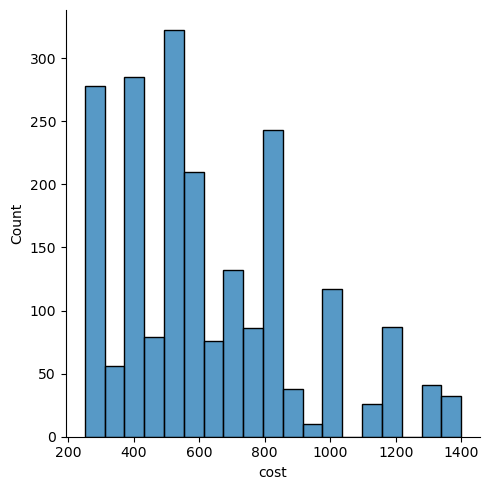

In [432]:
plt.figure(figsize=(300,300))
sns.displot(df['cost'])
plt.show()

In [433]:
#top favorite food
import re
df.index = range(df.shape[0])
likes = []
for i in range(df.shape[0]):
    array_split = re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)
        
favorite=pd.Series(likes).value_counts()
favorite.head(30)

<IPython.core.display.Javascript object>

 Pasta              239
 Sandwiches         159
 Burgers            151
 Pizza              138
 Nachos             129
 Coffee             129
 Fries              122
 Biryani            122
 Paratha            109
 Chicken Biryani    108
 Roti               101
 Mocktails          100
Coffee               98
Burgers              97
Pasta                97
 Thali               94
 Sandwich            89
 Noodles             86
 Salads              85
Pizza                83
 Mutton Biryani      79
 Tea                 76
 Butter Chicken      72
 Fish                72
Biryani              71
 Chaat               70
 Cocktails           70
 Masala Dosa         69
 Momos               68
 Salad               68
Name: count, dtype: int64

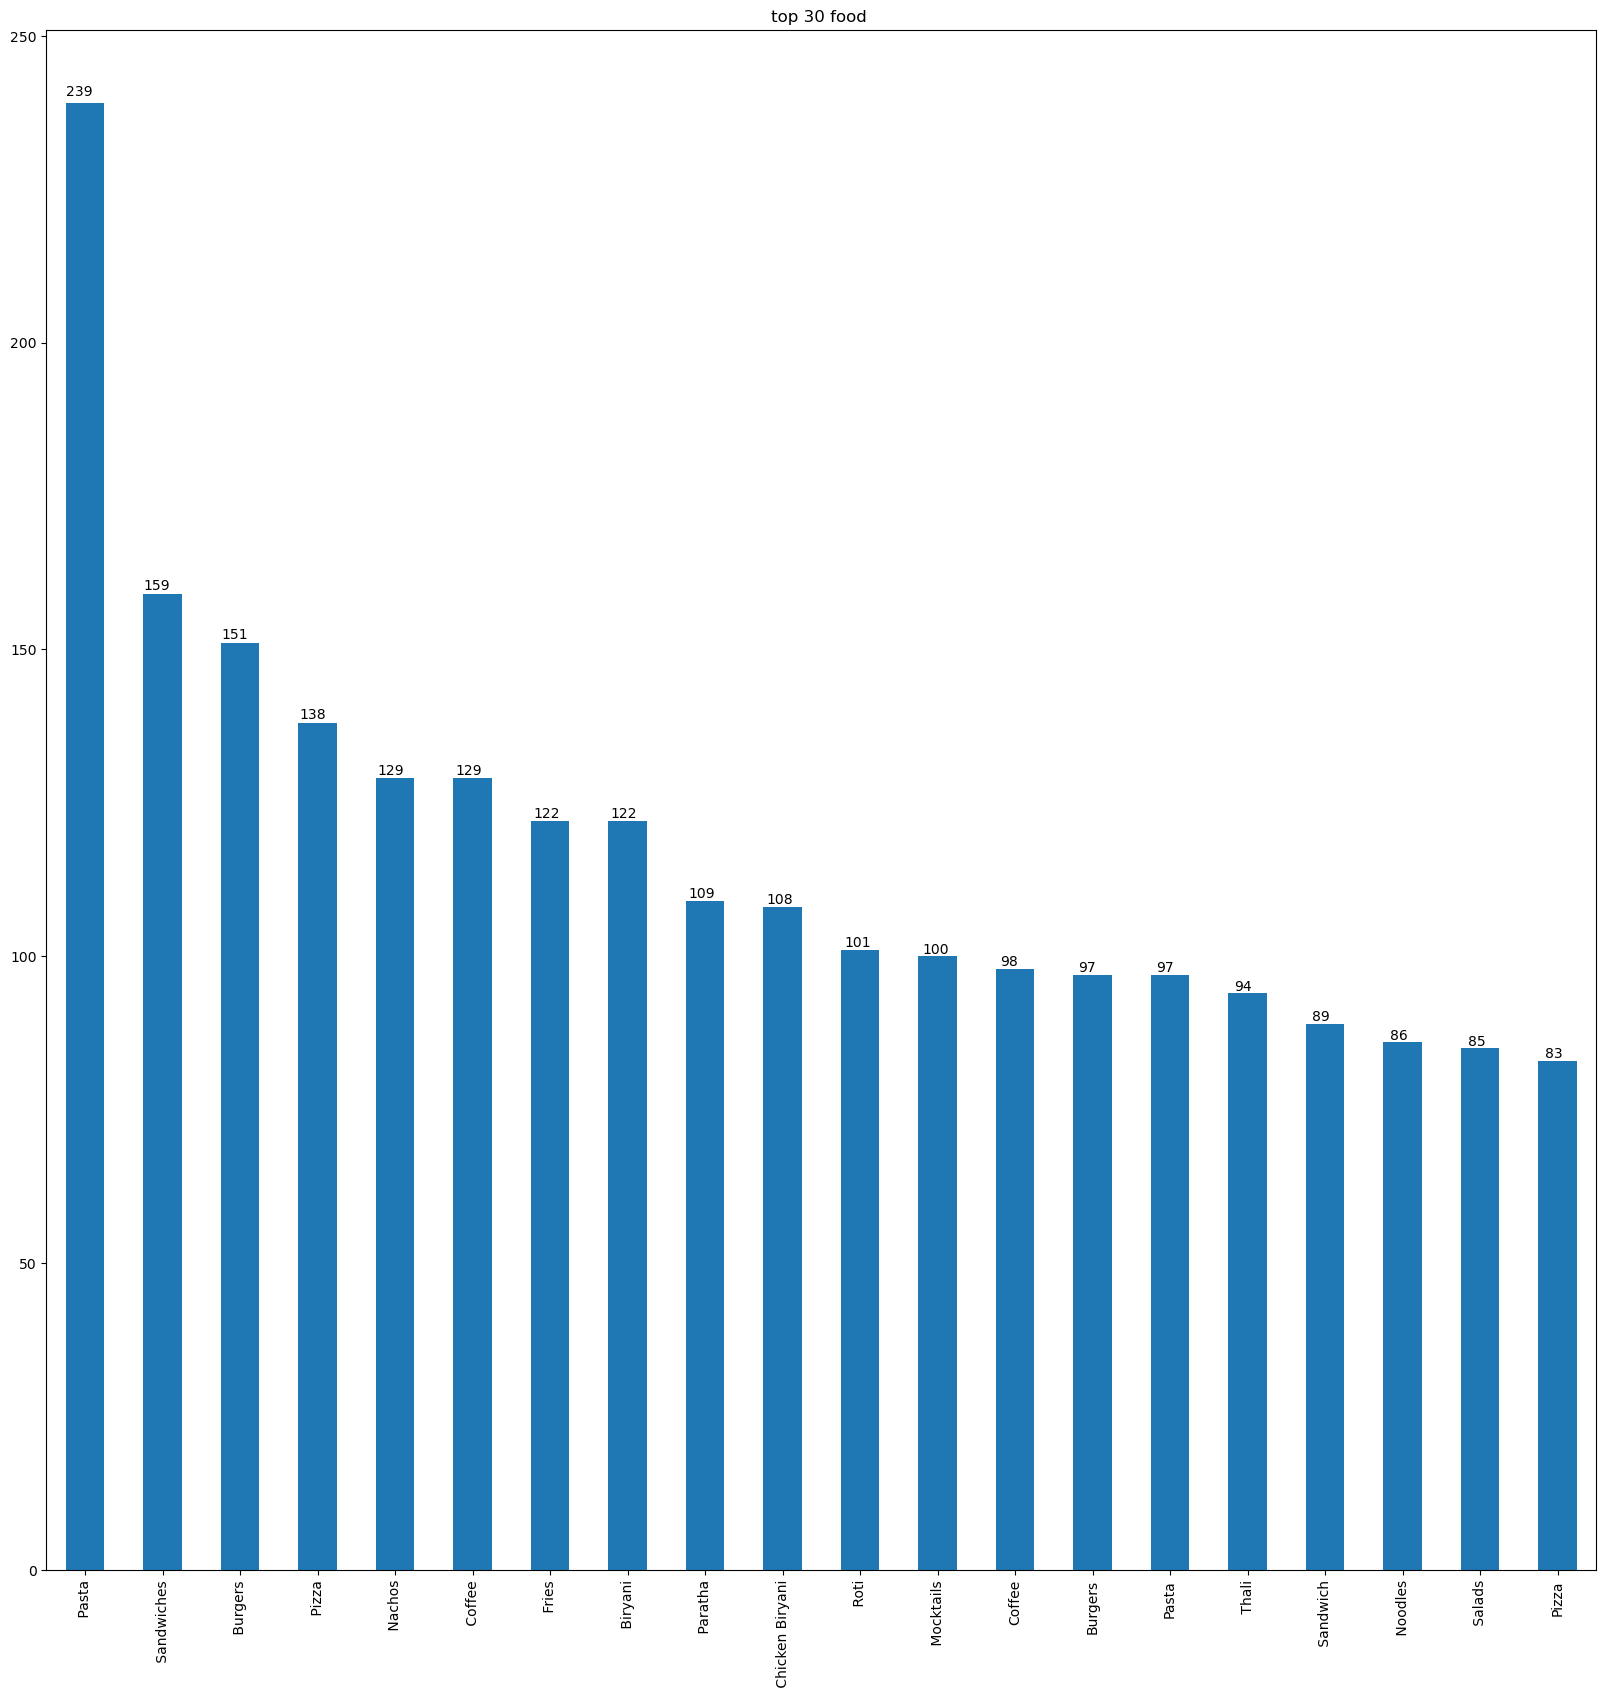

In [434]:
ax=favorite.nlargest(n = 20,keep ='first').plot(kind='bar',figsize=(20,20),title="top 30 food ")
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1.005,i.get_height()*1.005))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'number')

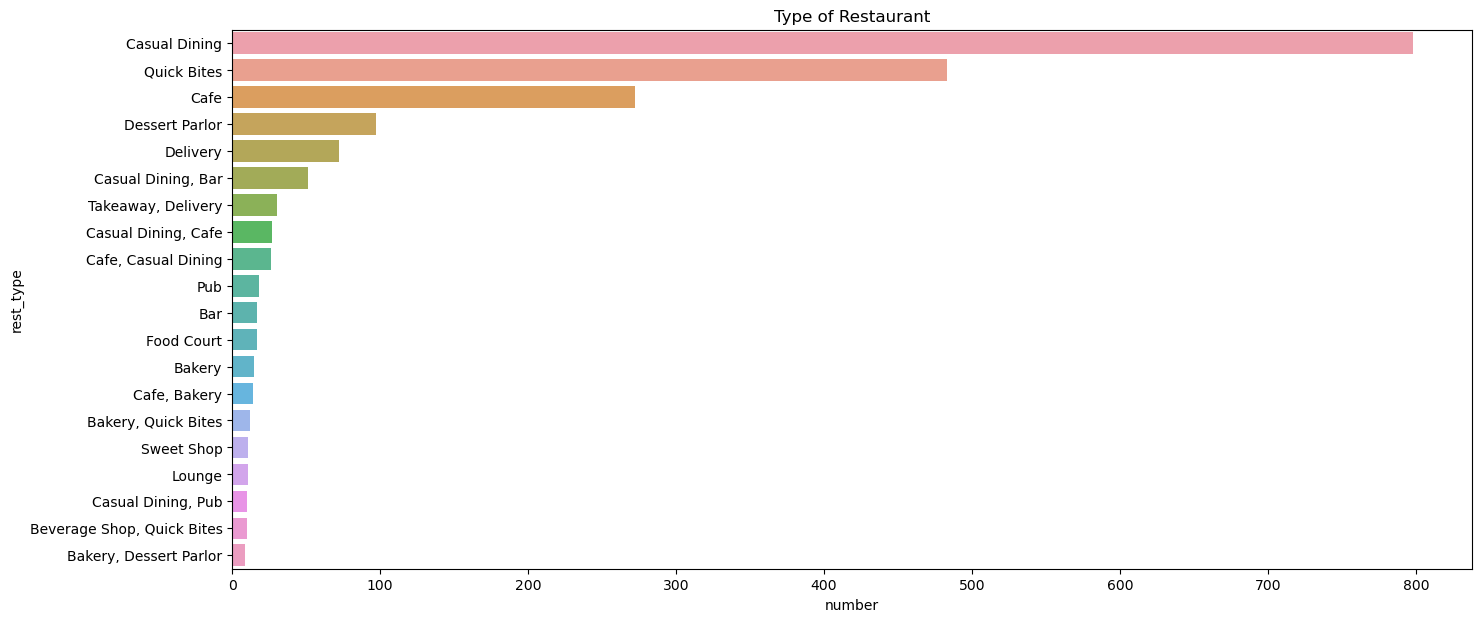

In [435]:
#restaurant and their count
plt.figure(figsize=(16,7))
rest= df['rest_type'].value_counts()[:20]
sns.barplot(x=rest, y=rest.index, alpha=0.9)
plt.title("Type of Restaurant")
plt.xlabel("number")


In [436]:
#BUILDING THE MODEL I DONT WANNA CREATE A  NEW NOTEBOOK TO LOST ALL CLEANING
#I DONT KNOW  BUT I WILL ASK THE TEACHER 
df.online_order[df.online_order == 'Yes'] =1
df.online_order[df.online_order == 'No'] =0
df.online_order = pd.to_numeric(df.online_order)
df.online_order.value_counts()

<IPython.core.display.Javascript object>

online_order
1    1624
0     494
Name: count, dtype: int64

In [437]:
#same as book table ,change bolean to int
df.book_table[df.book_table == 'Yes'] =1
df.book_table[df.book_table== 'No'] =0
df.book_table = pd.to_numeric(df.book_table)
df.book_table.value_counts()

<IPython.core.display.Javascript object>

book_table
0    1738
1     380
Name: count, dtype: int64

In [438]:
#skylearn 
le=LabelEncoder()
df.location=le.fit_transform(df.location)
df.rest_type=le.fit_transform(df.rest_type)
df.cuisines=le.fit_transform(df.cuisines)
df.menu_item=le.fit_transform(df.menu_item)

df.head()

<IPython.core.display.Javascript object>

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,15,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",471,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",435,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,15,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",221,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",435,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,12,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",189,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",435,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,36,Masala Dosa,550,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",435,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,3,15,"Panipuri, Gol Gappe",478,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",435,Buffet,Banashankari


In [439]:
my_data = df.iloc [:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('./../data/zomatoM.csv',index=False)


In [440]:
x = df.iloc [:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,15,471,800.0,435
1,1,0,787,1,15,221,800.0,435
2,1,0,918,1,12,189,800.0,435
3,0,0,88,1,36,550,300.0,435
4,0,0,166,3,15,478,600.0,435


In [441]:
y=df['rate']
y

0       4.1
1       4.1
2       3.8
3       3.7
4       3.8
       ... 
2113    3.0
2114    3.2
2115    3.9
2116    3.6
2117    3.8
Name: rate, Length: 2118, dtype: float64

In [442]:
df.dtypes

address          object
name             object
online_order      int64
book_table        int64
rate            float64
votes             int64
location          int32
rest_type         int32
dish_liked       object
cuisines          int32
cost            float64
reviews_list     object
menu_item         int32
type             object
city             object
dtype: object

In [443]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

<IPython.core.display.Javascript object>

In [444]:
#make our prediction to verify our model with the test on y portion
start=time.time()
model = LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
end=time.time()

print(f"LINEAR REGRESSION MODEL")
print(f"Score : {r2_score(y_test,prediction)}")
print(f"MSE : {mean_squared_error(y_test,prediction)}")
print(f"Time : {end-start}")


<IPython.core.display.Javascript object>

LINEAR REGRESSION MODEL
Score : 0.17189387645913623
MSE : 0.09192029971559554
Time : 0.0364682674407959


In [445]:
# Different Model Test Heavy Compute load 
#Random Forest
start=time.time()
random_forest = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=0.0001)
random_forest.fit(x_train,y_train)
prediction = random_forest.predict(x_test)
end=time.time()

print(f"RANDOM FOREST MODEL")
print(f"Score : {r2_score(y_test,prediction)}")
print(f"MSE : {mean_squared_error(y_test,prediction)}")
print(f"Time : {end-start}")

<IPython.core.display.Javascript object>

RANDOM FOREST MODEL
Score : 0.6401548038660364
MSE : 0.03994304273275788
Time : 4.6863319873809814


In [446]:
#Extra Tree Regressor
start=time.time()
extra_tree= ExtraTreesRegressor(n_estimators=120)
extra_tree.fit(x_train,y_train)
prediction = extra_tree.predict(x_test)
end=time.time()
print(f"EXTRA REGRESSOR MODEL")
print(f"Score : {r2_score(y_test,prediction)}")
print(f"MSE : {mean_squared_error(y_test,prediction)}")
print(f"Time : {end-start}")


EXTRA REGRESSOR MODEL
Score : 0.6271921282494834
MSE : 0.041381907866002834
Time : 0.48871684074401855


In [447]:
# Gradient Boosting Regressor,
start=time.time()
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=10)
xgb_regressor.fit(x_train, y_train)
prediction = xgb_regressor.predict(x_test)
end=time.time()

print(f"XG BOOST REGRESSOR MODEL")
print(f"Score : {r2_score(y_test,prediction)}")
print(f"MSE : {mean_squared_error(y_test,prediction)}")
print(f"Time : {end-start}")

XG BOOST REGRESSOR MODEL
Score : 0.6615621290088591
MSE : 0.03756681619934742
Time : 0.17293620109558105


In [448]:
#Split and train :Linear Regression Model and caching the model

extra_tree = ExtraTreesRegressor(n_estimators = 120)
extra_tree.fit(x_train , y_train)
prediction = extra_tree.predict(x_test)
pickle.dump(extra_tree , open('./../data/model.pkl' , 'wb'))

<IPython.core.display.Javascript object>